(644, 968, 3)
[[250.69  250.69  250.69  ... 228.897 228.897 228.897]
 [250.69  250.69  250.69  ... 228.897 228.897 228.897]
 [250.69  250.69  250.69  ... 228.897 228.897 228.897]
 ...
 [223.008 223.008 223.008 ... 212.319 206.803 204.803]
 [223.008 223.008 223.008 ... 229.319 219.803 212.803]
 [223.008 223.008 223.008 ... 238.319 229.803 218.803]]
255.0


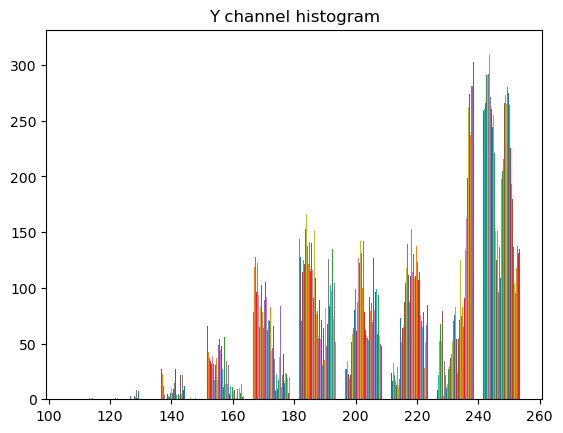

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
from PIL import Image
from skimage.io import imread

sample_img = imread('./img/lake.jpg')
print(sample_img.shape)

yiq = np.array([[0.299, 0.587, 0.114],
                [0.595879, -0.274133, -0.321746],
                [0.211205, -0.523083, 0.311878]])


yiq_img = np.dot(sample_img.reshape(-1,3), yiq.transpose()).reshape(sample_img.shape)

print(yiq_img[:,:,0])
print(np.max(yiq_img[:,:,0]))

plt.hist(yiq_img[:,:,0]) 
plt.title("Y channel histogram") 
plt.savefig('./out/Y_hist.jpg')
plt.show()


255.0


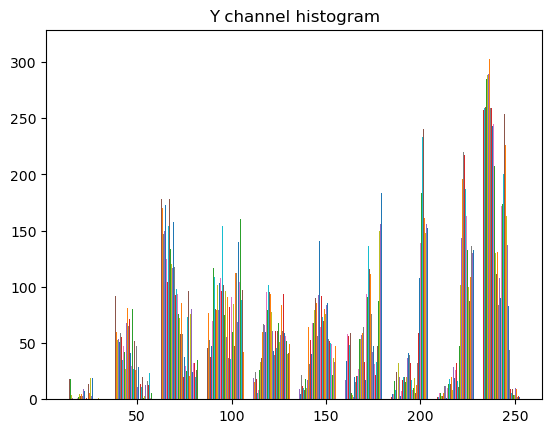

In [2]:
gamma = 3.5

for x,i in enumerate(yiq_img[:,:,0]):
    for y,j in enumerate(i) :
        temp = j/255
        temp = math.pow(temp,gamma)
        j = temp * 255
        yiq_img[x][y][0] = j

#print(yiq_img[:,:,0])
print(np.max(yiq_img[:,:,0]))
plt.hist(yiq_img[:,:,0]) 
plt.title("Y channel histogram") 
plt.savefig('./out/Y_hist_gamma.jpg')
plt.show()


In [3]:
yiq = np.array([[0.299, 0.587, 0.114],
                [0.595879, -0.274133, -0.321746],
                [0.211205, -0.523083, 0.311878]])


rgb = np.linalg.inv(yiq)

sample_img2 = np.dot(yiq_img.reshape(-1,3), rgb.transpose()).reshape(yiq_img.shape)

sample_img2 = sample_img2.astype(np.uint8)


img = Image.fromarray(sample_img2, 'RGB')
img.save('./out/gamma_img.jpg')
img.show

<bound method Image.show of <PIL.Image.Image image mode=RGB size=968x644 at 0x28B662F4D90>>